In [1]:
import numpy as np
import cv2
import matplotlib.pylab as plt
MINIMAP_SIZE = 170

s4map = cv2.imread('Fortnite-map-season4-high-res.jpg', cv2.IMREAD_COLOR)
s4map_3k = cv2.imread('Fortnite s4map 3k.jpg', cv2.IMREAD_COLOR)
test5x5 = cv2.imread('test5x5.jpg', cv2.IMREAD_COLOR)
test2x2 = cv2.imread('testTile2x2.jpg', cv2.IMREAD_COLOR)
testTile = cv2.imread('test tile.jpg', cv2.IMREAD_COLOR)
checked = np.zeros((s4map.shape[0], s4map.shape[1]))

def extract_minimap(frame):
    minimap = np.zeros((MINIMAP_SIZE, MINIMAP_SIZE, 3), np.dtype('uint8'))
    for i in range(MINIMAP_SIZE):
        for j in range(MINIMAP_SIZE):
            for k in range(3):
                minimap[i][j][k] = frame[17 + i][1090 + j][k]
    return minimap

(2183, 2217)


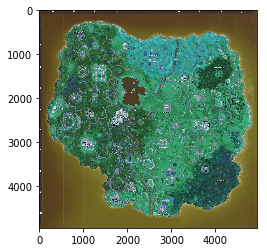

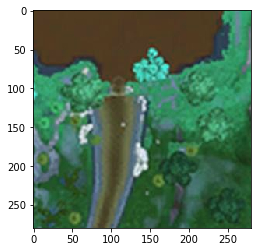

In [2]:
res = cv2.matchTemplate(s4map, testTile, cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc
bottom_right = (top_left[0] + 280, top_left[1] + 280)
actual_loc = (top_left[0] + 140, top_left[1] + 140)
print(actual_loc)

plt.imshow(s4map)
plt.show()
plt.imshow(testTile)
plt.show()

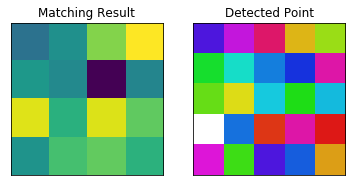

(2, 1)
(2, 1)


In [3]:
res = cv2.matchTemplate(test5x5,test2x2,cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc
bottom_right = (top_left[0] + 2, top_left[1] + 2)
#cv2.rectangle(test5x5,top_left, bottom_right, 255, 2)

plt.subplot(121),plt.imshow(res)
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(test5x5)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.show()
print(top_left)
print(min_loc)

In [ ]:
import os

def video_to_frames(video, path_output_dir):
    # extract frames from a video and save to directory as 'x.png' where 
    # x is the frame index
    vidcap = cv2.VideoCapture(video)
    count = 0
    while vidcap.isOpened():
        success, image = vidcap.read()
        if success:
            cv2.imwrite(os.path.join(path_output_dir, '%d.png') % count, image)
            count += 1
        else:
            break
    cv2.destroyAllWindows()
    vidcap.release()


In [4]:
cap = cv2.VideoCapture('Ninja Myth Round 2.mp4')
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
seconds = frameCount / 30
buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

print(frameCount)
print(frameWidth)
print(frameHeight)

fc = 0
ret = True

for i in range(20000):
    if (i % 30 == 0):
        ret, buf[fc] = cap.read()
    else:
        cap.read()
    fc += 1
    if (fc % 1000 == 0):
        print(fc)

cap.release()


35685
1280
720
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000


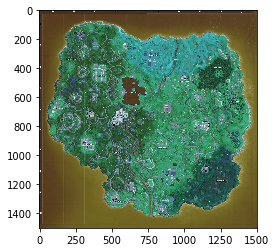

(1064.0, 600.0)
(1067.0, 599.0)
(1069.0, 601.0)
(1070.0, 601.0)
(1069.0, 602.0)
(1069.0, 602.0)
(1069.0, 602.0)
(1070.0, 601.0)
(1074.0, 600.0)
(1074.0, 601.0)
(1074.0, 601.0)
(1074.0, 601.0)
(1072.0, 603.0)
(1071.0, 605.0)
(1071.0, 604.0)
(1071.0, 603.0)
(1072.0, 603.0)
(1071.0, 605.0)
(1072.0, 605.0)
(1072.0, 604.0)
(1072.0, 604.0)
(1071.0, 601.0)
(1071.0, 599.0)
(1072.0, 599.0)
(1073.0, 598.0)
(1073.0, 599.0)
(1072.0, 598.0)
(95.0, 100.0)
(1072.0, 598.0)
(1072.0, 598.0)
(95.0, 100.0)
(1072.0, 599.0)
(1072.0, 601.0)
(1072.0, 601.0)
(1072.0, 601.0)
(1072.0, 601.0)
(1072.0, 601.0)
(1072.0, 601.0)
(1073.0, 600.0)
(1076.0, 598.0)
(1077.0, 600.0)
(1077.0, 603.0)
(1078.0, 606.0)
(1080.0, 609.0)
(1083.0, 610.0)
(1086.0, 610.0)
(1088.0, 608.0)
(1090.0, 605.0)
(1091.0, 603.0)
(1092.0, 602.0)
(1091.0, 602.0)
(1091.0, 602.0)
(1091.0, 603.0)
(1090.0, 604.0)
(1091.0, 602.0)
(1091.0, 603.0)
(1090.0, 606.0)
(1088.0, 607.0)
(1089.0, 607.0)
(1092.0, 608.0)
(1095.0, 607.0)
(1097.0, 605.0)
(1097.0, 606

In [5]:
plt.imshow(s4map_3k)
plt.show()

for i in range(90, 250):
    minimap = extract_minimap(buf[i * 30])
    res = cv2.matchTemplate(s4map_3k, minimap, cv2.TM_SQDIFF)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = min_loc
    bottom_right = (top_left[0] + MINIMAP_SIZE, top_left[1] + MINIMAP_SIZE)
    actual_loc = (top_left[0] + MINIMAP_SIZE/2, top_left[1] + MINIMAP_SIZE/2)
    #plt.imshow(minimap)
    #plt.show()
    print(actual_loc)

In [ ]:
buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

fc = 0
ret = True

while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1

cap.release()

cv2.namedWindow('frame 10')
cv2.imshow('frame 10', buf[9])

cv2.waitKey(0)